In [1]:
"""
Descriptive analysis of the video games data using seaborn plots
ign.csv from https://www.kaggle.com/egrinstein/20-years-of-games
vgsales.csv from https://www.kaggle.com/gregorut/videogamesales/version/2
"""
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import numpy as np
import seaborn as sns

df = pd.read_csv("ign.csv")
sales = pd.read_csv("vgsales.csv")
data = pd.merge(df, sales, how="inner", left_on="title", right_on="Name", )

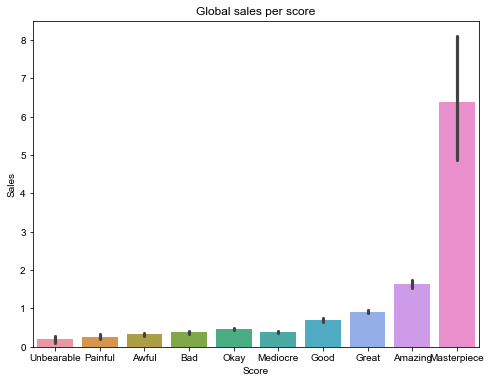

In [2]:
# Relation between the score phrase and the sales
plt.figure(figsize=(8,6))
plt.title('Global sales per score')
sns.set(font_scale=1)
plot = sns.barplot(x = data["score_phrase"], y = data['Global_Sales'], order=['Unbearable', 'Painful', 'Awful', 'Bad', 'Okay', 'Mediocre', 'Good', 'Great', 'Amazing', 'Masterpiece'])
plot.set(xlabel='Score', ylabel='Sales')
plt.show()

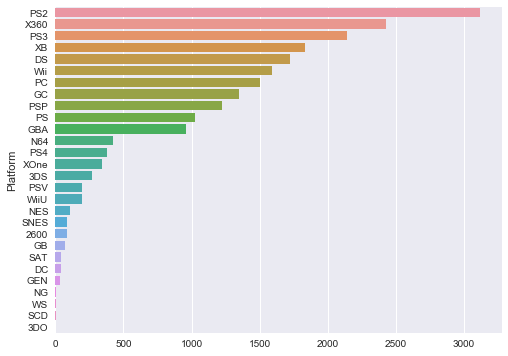

In [3]:
# Amount of games per platform
PL_GE = pd.crosstab(data['Platform'], data['Genre'])
PL_GE_Total = PL_GE.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = PL_GE_Total.index, x = PL_GE_Total.values, orient='h')
plt.show()

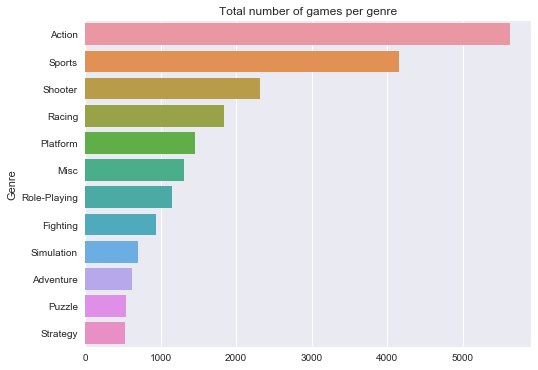

In [4]:
# Amount of games per genre
PL_GE = pd.crosstab(data['Platform'], data['Genre'])
PL_GE_Total = PL_GE.sum(axis=0).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = PL_GE_Total.index, x = PL_GE_Total.values, orient='h')
plt.title("Total number of games per genre")
plt.show()

In [5]:
# Selecting the top 10 platforms 
Big_plat = data.groupby(['Platform']).agg({'Platform': 'count'}).sort_values('Platform', ascending=False).head(10)
list_plat = list(Big_plat['Platform'].index)

# Selecting the top 10 genres
Big_genre = data.groupby(['Genre']).agg({'Genre': 'count'}).sort_values('Genre', ascending=False).head(10)
list_genre = list(Big_genre['Genre'].index)

# Selecting the data with the top 10 platforms and genres
small_data = data[data['Genre'].isin(list_genre)]
small_data = small_data[small_data['Platform'].isin(list_plat)].reset_index().drop(['index', 'Unnamed: 0'], axis= 1)

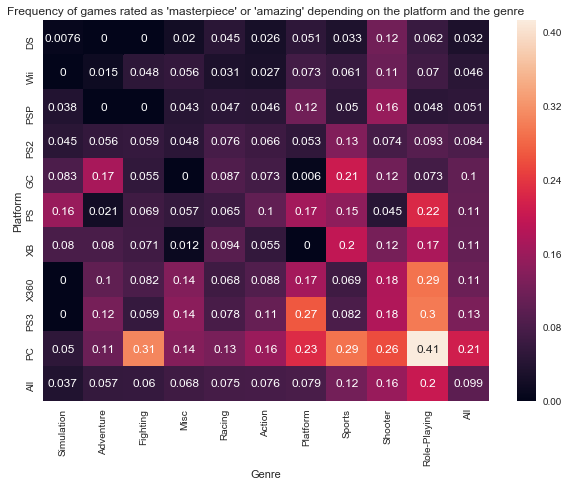

In [7]:
# Heat map based on the cross tab of percentage of great games for platform and genre
# Creating the cross tab for count of games per platform 
PL_GE_COUNT = pd.crosstab(small_data['Platform'], small_data['Genre'], margins=True)
Masterpieces = small_data[small_data['score_phrase'].isin(['Amazing','Masterpiece'])]
L_GE_MASTER_FREQ = PL_GE_MASTER.div(PL_GE_COUNT).sort_values('All', axis=1).sort_values('All')

# Putting back the total rows and columns at the end
PL_GE_MASTER_FREQ = PL_GE_MASTER_FREQ.reindex(columns=(list([a for a in PL_GE_MASTER_FREQ.columns if a != 'All']) + ['All']))
PL_GE_MASTER_FREQ = PL_GE_MASTER_FREQ.reindex(index=(list([a for a in PL_GE_MASTER_FREQ.index if a != 'All']) + ['All']))

#Turning into a heat map
sns.set(font_scale=1)
plt.figure(figsize=(10,7))
plt.title("Frequency of games rated as 'masterpiece' or 'amazing' depending on the platform and the genre")
sns.heatmap(PL_GE_MASTER_FREQ, annot=True)
plt.show()

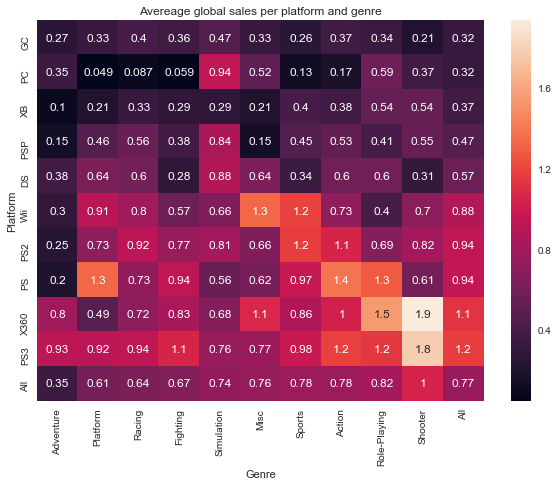

In [6]:
# Heat map based on the cross tab of mean sales for platform and genre
# Creating the cross tab and ordering the values
PL_GE_GS = pd.crosstab(small_data['Platform'], small_data['Genre'], values=small_data['Global_Sales'], aggfunc=np.mean, margins=True).sort_values('All', axis=1).sort_values('All')
# Putting back the total rows and columns at the end
PL_GE_GS = PL_GE_GS.reindex(columns=(list([a for a in PL_GE_GS.columns if a != 'All']) + ['All']))
PL_GE_GS = PL_GE_GS.reindex(index=(list([a for a in PL_GE_GS.index if a != 'All']) + ['All']))
#Turning into a heat map
sns.set(font_scale=1)
plt.figure(figsize=(10,7))
plt.title("Avereage global sales per platform and genre")
sns.heatmap(PL_GE_GS, annot=True)
plt.show()

In [12]:
## Creating data frames to analyse regional data
# Creating a small dataframe with only useful info, and adding the sales percentages per region
reduced_data = small_data.drop(['platform', 'genre', 'title', 'url', 'release_day', 'editors_choice'], axis=1)
reduced_data['NA_Sales_Perc'] = reduced_data['NA_Sales'] * 100 / reduced_data['Global_Sales'] 
reduced_data['EU_Sales_Perc'] = reduced_data['EU_Sales'] * 100 / reduced_data['Global_Sales'] 
reduced_data['JP_Sales_Perc'] = reduced_data['JP_Sales'] * 100 / reduced_data['Global_Sales'] 
reduced_data['Other_Sales_Perc'] = reduced_data['Other_Sales'] * 100 / reduced_data['Global_Sales'] 

# Data with one row per region
new_data = pd.DataFrame(columns=['score', 'Platform', 'Genre', 'Sales', 'Region'])

for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    new_data_region = pd.DataFrame(columns=['score', 'Platform', 'Genre', 'Sales', 'Region'])
    for x in small_data:
        new_data_region['score'] = small_data['score']
        new_data_region['Platform'] = small_data['Platform']
        new_data_region['Genre'] = small_data['Genre']
        new_data_region['Sales'] = small_data[region]
        new_data_region['Region'] = region[:-6]
    new_data = new_data.append(new_data_region)
new_data = new_data.reset_index()

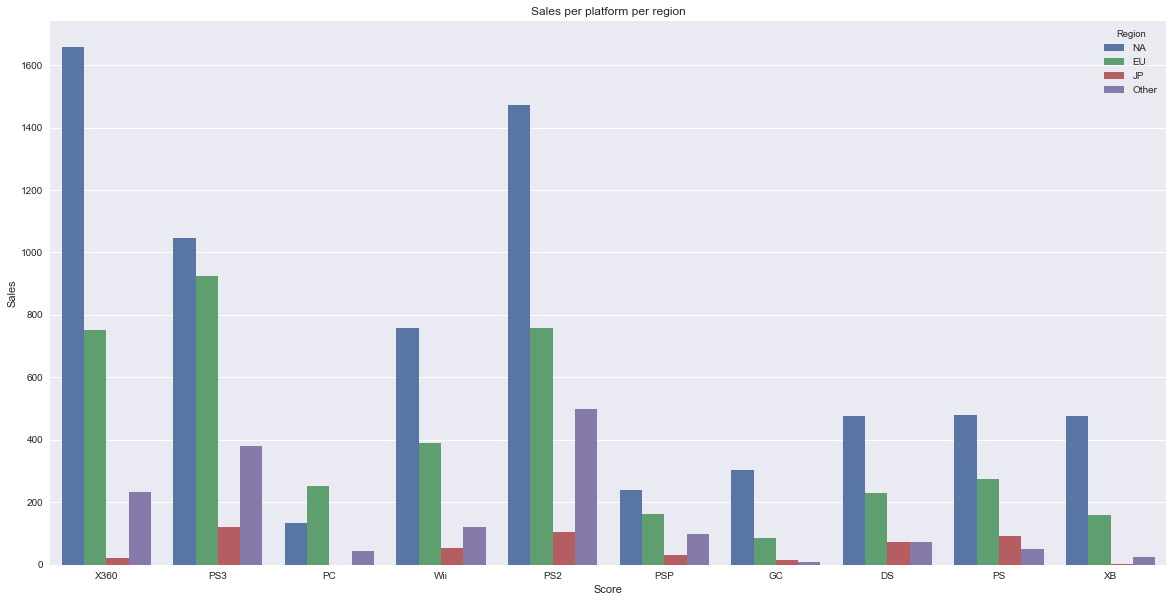

In [14]:
# Relation between platform and sales --> per region
plt.figure(figsize=(20,10))
plt.title('Sales per platform per region')
sns.set(font_scale=1)
plot = sns.barplot(x="Platform", y="Sales", hue="Region", data=new_data, ci=None, estimator=sum)
plot.set(xlabel='Score', ylabel='Sales')
plt.show()